This Notebook contains examples of plots of the solutions to Burger Equation and Wave Equation using Gaussian Process with various parameters such number of test point, noise and timestep

In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [20]:
######################################## Parameters ########################################
## edit these parameters to choose the dataset to read

name = "Burger"
kernel = "RBF"
test_point = 31
noise = 0.01
dt = 0.01

In [21]:
# define foldername 
foldername = f"{name}_{kernel}_"+f"{test_point}_test_points_"+f"{noise}_noise_"+f"{dt}_timestep"
folderpath = "../result/" + foldername

# check if foler exist
if not os.path.exists(folderpath):
    raise Exception(f"Folder {folderpath} does not exist") 

# read data from .npy files
u_mean = np.load(folderpath + "/u_mean.npy")
u_std = np.load(folderpath + "/u_std.npy")
x = np.load(folderpath + "/x.npy")
error = np.load(folderpath + "/error.npy")
u_true = np.load(folderpath + "/u_true.npy")


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


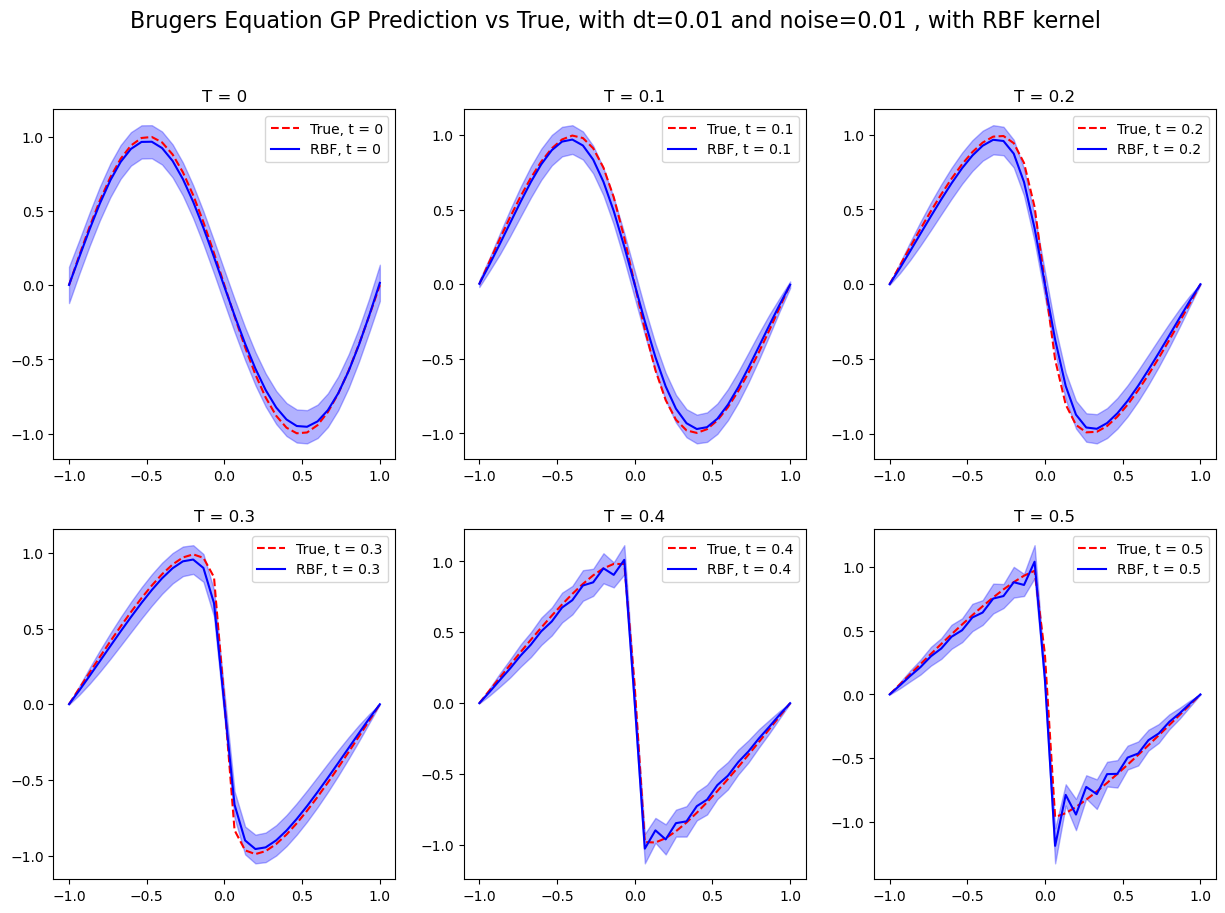

In [22]:
# plot the behavior over time 
t_list = [int(x/dt/10) for x in range (0,10)]
print (t_list)

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for i, t in enumerate(t_list):
    t_index = int(t/dt)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x, u_true[t_index], label="True, t = " + str(t), color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x, u_mean[t_index], label=f"{kernel}, t = " + str(t), color = 'blue')
    # uncertainty
    axs[i//3, i%3].fill_between(x, u_mean[t_index]-u_std[t_index], u_mean[t_index]+u_std[t_index], alpha=0.3, color = 'blue')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt} and noise={noise} , with {kernel} kernel", fontsize=16)
# plt.savefig("../result/uncertainty.png")
plt.show()




## Compare two different kernels

In [23]:
########################### Parameters ################################
### This is an example of comparing two different kernels with the same parameterls

name1 = "Burger"
kernel1 = "arcsin"
test_point1 = 31
noise1 = 0.01
dt1 = 0.001

name2 = "Burger"
kernel2 = "RBF"
test_point2 = 31
noise2 = 0.01
dt2 = 0.001


In [24]:
# define folder names
foldername1 = f"{name1}_{kernel1}_{test_point1}_test_points_{noise1}_noise_{dt1}_timestep"
foldername2 = f"{name2}_{kernel2}_{test_point2}_test_points_{noise2}_noise_{dt2}_timestep"

# define paths to the folders
folderpath1 = "../result/" + foldername1
folderpath2 = "../result/" + foldername2

# check if folders exist
if not os.path.exists(folderpath1):
    raise Exception(f"Folder {folderpath1} does not exist")
if not os.path.exists(folderpath2):
    raise Exception(f"Folder {folderpath2} does not exist")

# read data from .npy files in both paths
u_mean1 = np.load(folderpath1 + "/u_mean.npy")
u_std1 = np.load(folderpath1 + "/u_std.npy")
x1 = np.load(folderpath1 + "/x.npy")
error1 = np.load(folderpath1 + "/error.npy")
u_true1 = np.load(folderpath1 + "/u_true.npy")

u_mean2 = np.load(folderpath2 + "/u_mean.npy")
u_std2 = np.load(folderpath2 + "/u_std.npy")
x2 = np.load(folderpath2 + "/x.npy")
error2 = np.load(folderpath2 + "/error.npy")
u_true2 = np.load(folderpath2 + "/u_true.npy")


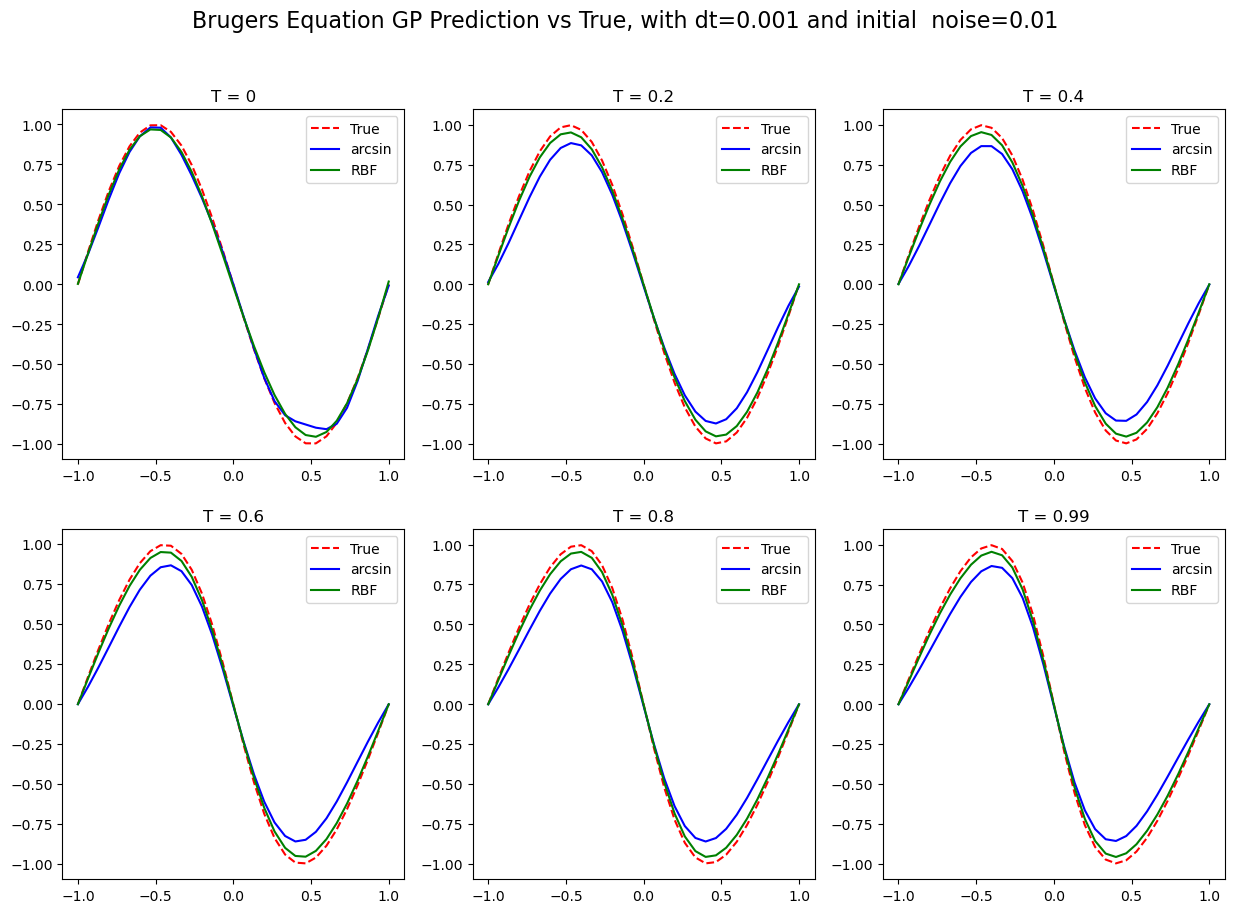

In [25]:
# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0, 0.2, 0.4, 0.6, 0.8, 0.99]
for i, t in enumerate(t_list):
    t_index = int(t/dt)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x, u_true2[t_index], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x, u_mean1[t_index], label=f"{kernel1}", color = 'blue')
    axs[i//3, i%3].plot(x, u_mean2[t_index], label=f"{kernel2}", color = 'green')
    # uncertainty
    # axs[i//3, i%3].fill_between(x, u_mean1[t_index]-u_std1[t_index], u_mean1[t_index]+u_std1[t_index], alpha=0.3, color = 'blue')
    # axs[i//3, i%3].fill_between(x, u_mean2[t_index]-u_std2[t_index], u_mean2[t_index]+u_std2[t_index], alpha=0.3, color = 'green')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt1} and initial  noise={noise1}", fontsize=16)
# plt.savefig("../result/kernel_comparison.png")
plt.show()

## compare time-step dt

In [26]:
name1 = "Burger"
kernel1 = "arcsin"
test_point1 = 31
noise1 = 0.00
dt1 = 0.01

name2 = "Burger"
kernel2 = "arcsin"
test_point2 = 31
noise2 = 0.00
dt2 = 0.001

In [27]:
# define folder names
foldername1 = f"{name1}_{kernel1}_{test_point1}_test_points_{noise1}_noise_{dt1}_timestep"
foldername2 = f"{name2}_{kernel2}_{test_point2}_test_points_{noise2}_noise_{dt2}_timestep"

# define paths to the folders
folderpath1 = "../result/" + foldername1
folderpath2 = "../result/" + foldername2

# check if folders exist
if not os.path.exists(folderpath1):
    raise Exception(f"Folder {folderpath1} does not exist")
if not os.path.exists(folderpath2):
    raise Exception(f"Folder {folderpath2} does not exist")

# read data from .npy files in both paths
u_mean1 = np.load(folderpath1 + "/u_mean.npy")
u_std1 = np.load(folderpath1 + "/u_std.npy")
x1 = np.load(folderpath1 + "/x.npy")
error1 = np.load(folderpath1 + "/error.npy")
u_true1 =  np.load(folderpath1 + "/u_true.npy")

u_mean2 = np.load(folderpath2 + "/u_mean.npy")
u_std2 = np.load(folderpath2 + "/u_std.npy")
x2 = np.load(folderpath2 + "/x.npy")
error2 = np.load(folderpath2 + "/error.npy")
u_true2 = np.load(folderpath2 + "/u_true.npy")

# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
t_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
for i, t in enumerate(t_list):
    t_index1 = int(t/dt1)
    t_index2 = int(t/dt2)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x, u_true2[t_index2], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x, u_mean1[t_index1], label=f"dt = {dt1}", color = 'blue')
    axs[i//3, i%3].plot(x, u_mean2[t_index2], label=f"dt = {dt2}", color = 'green')
    # uncertainty
    # axs[i//3, i%3].fill_between(x, u_mean1[t_index]-u_std1[t_index], u_mean1[t_index]+u_std1[t_index], alpha=0.3, color = 'blue')
    # axs[i//3, i%3].fill_between(x, u_mean2[t_index]-u_std2[t_index], u_mean2[t_index]+u_std2[t_index], alpha=0.3, color = 'green')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()
plt.suptitle(f"Brugers Equation GP Prediction vs True, with dt={dt1} and initial  noise={noise1}", fontsize=16)
plt.savefig("../result/kernel_comparison.png")
plt.show()
    

Exception: Folder ../result/Burger_arcsin_31_test_points_0.0_noise_0.001_timestep does not exist

Plot the wave equation solution

10
100
200
300
400
500


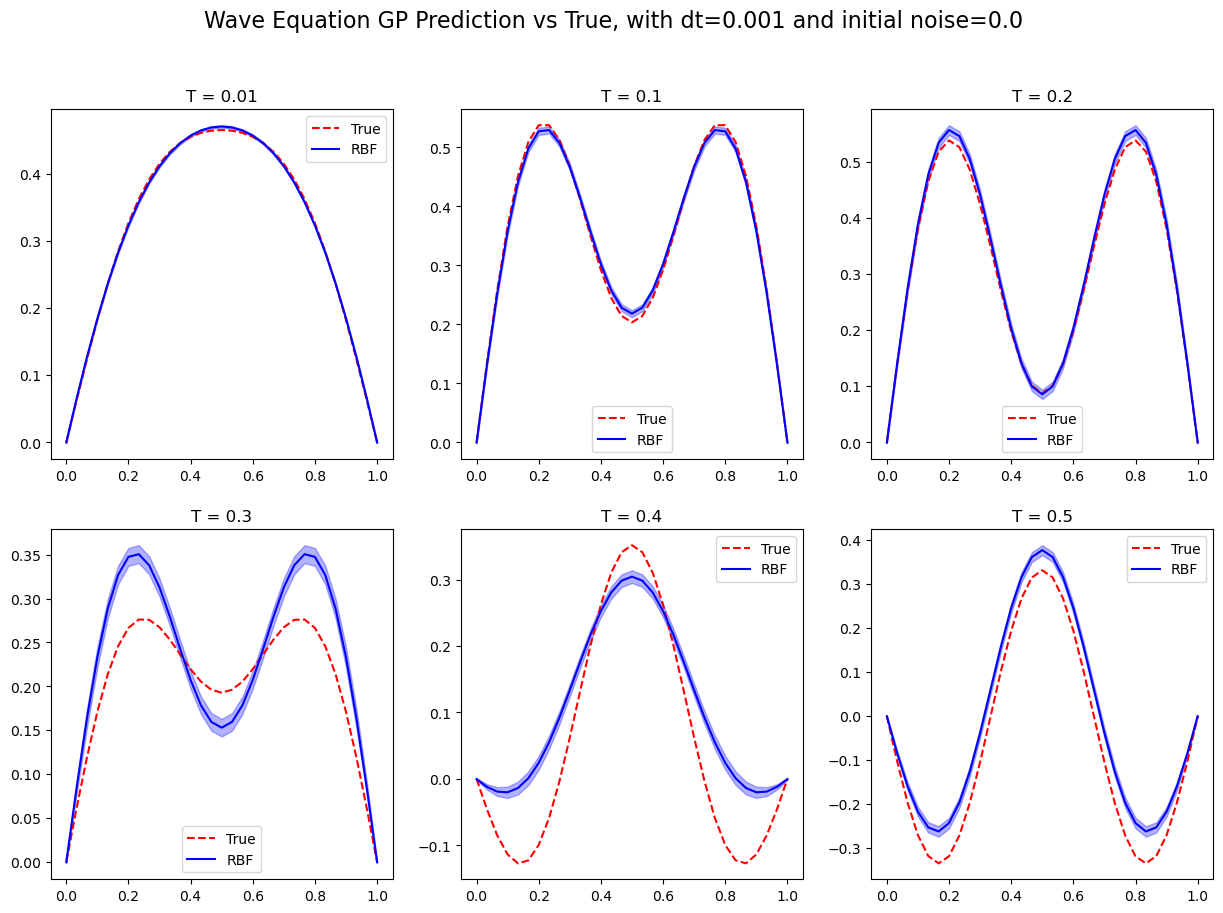

In [ ]:
name_wave = "Wave"
kernel_wave = "RBF"
test_point_wave = 31
noise_wave = 0.00
dt_wave = 0.001

# define foldername
foldername_wave = f"{name_wave}_{kernel_wave}_{test_point_wave}_test_points_{noise_wave}_noise_{dt_wave}_timestep"
folderpath_wave = "result/" + foldername_wave

# check if folder exists
if not os.path.exists(folderpath_wave):
    raise Exception(f"Folder {folderpath_wave} does not exist")

# read data from .npy files
u_mean_wave = np.load(folderpath_wave + "/u_mean.npy")
u_std_wave = np.load(folderpath_wave + "/u_std.npy")
v_mean_wave = np.load(folderpath_wave + "/v_mean.npy")
v_std_wave = np.load(folderpath_wave + "/v_std.npy")
x_wave = np.load(folderpath_wave + "/x.npy")
# error_wave = np.load(folderpath_wave + "/error.npy")
u_true_wave = np.load(folderpath_wave + "/u_true.npy")
v_true_wave = np.load(folderpath_wave + "/v_true.npy")

# plot the behavior over time for each kernel

# subplot of 2 * 3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

t_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for i, t in enumerate(t_list):
    t_index = int(t/dt_wave)
    print (t_index)
    # plot the true solution, with dashed line
    axs[i//3, i%3].plot(x_wave[:test_point_wave], u_true_wave[t_index], label="True", color = 'red', linestyle='dashed')
    axs[i//3, i%3].plot(x_wave[:test_point_wave], u_mean_wave[t_index], label=f"{kernel_wave}", color = 'blue')

    # plot the true solution of v, with dashed line
    # axs[i//3, i%3].plot(x_wave[:test_point_wave], v_true_wave[t_index], label="True", color = 'red', linestyle='dashed')
    # axs[i//3, i%3].plot(x_wave[:test_point_wave], v_mean_wave[t_index], label=f"{kernel_wave}", color = 'blue')
    # uncertainty
    axs[i//3, i%3].fill_between(x_wave[:test_point_wave], u_mean_wave[t_index]-u_std_wave[t_index], u_mean_wave[t_index]+u_std_wave[t_index], alpha=0.3, color = 'blue')
    axs[i//3, i%3].set_title(f"T = {t}")
    axs[i//3, i%3].legend()

plt.suptitle(f"Wave Equation GP Prediction vs True, with dt={dt_wave} and initial noise={noise_wave}", fontsize=16)
plt.savefig("result/wave.png")
plt.show()

